### Heat map for the results of ANN regression of Eff-score

This notebook to present the results of the ANN regression for the Eff-Score with different combinations of inputs and route sections


The route sections:All, North, Middle, South, and Direct

The indeces for inputs combinations: 0, 1, 2, and 3

This notebook is reproducible,  the user just needs to chang the user_name in first cell, then the rest will automatically be created, such as folders and subfolders where figure and excel files are saved.


In [1]:
user_name='mohabu'

In [2]:
inputs_idx=[0,1,2,3] ## index of input variables

In [3]:
search_eff_fl_sog=0; Res="Eff"  ## search of eff-score regression's results


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
##### folder name for saving files: figures, data, etc ####
Output_folder='Spatio_Temporl_Agg_Eff_Score'


Output_Subfolder = Output_folder+'/Heatmap_ANN_Reg_Eff_Diff_Sections_Inputs_v1'+'/NMS_'+'search_eff_fl_sog'+Res


In [6]:
folder_path = r'C:/Users/'+user_name+'/'+Output_Subfolder
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [7]:
df0=pd.read_excel('C:/Users/'+user_name+'/Spatio_Temporl_Agg_Eff_Score/Results_Search_ANN_Reg_Eff/Search_Eff_Reg_Mod_All_weathers_loc_0_NMS_0_EffTp_1_GrOck_2_0.7288.xlsx')
#     if nth_mid_sth_fg==1:    
df1=pd.read_excel('C:/Users/'+user_name+'/Spatio_Temporl_Agg_Eff_Score/Results_Search_ANN_Reg_Eff/Search_Eff_Reg_Mod_All_weathers_loc_0_NMS_1_EffTp_1_GrOck_2_0.9928.xlsx')
#     if nth_mid_sth_fg==2:
df2=pd.read_excel('C:/Users/'+user_name+'/Spatio_Temporl_Agg_Eff_Score/Results_Search_ANN_Reg_Eff/Search_Eff_Reg_Mod_All_weathers_loc_0_NMS_2_EffTp_1_GrOck_2_0.7448.xlsx')
#     if nth_mid_sth_fg==3:
df3=pd.read_excel('C:/Users/'+user_name+'/Spatio_Temporl_Agg_Eff_Score/Results_Search_ANN_Reg_Eff/Search_Eff_Reg_Mod_All_weathers_loc_0_NMS_3_EffTp_1_GrOck_2_0.1707.xlsx')
#     if nth_mid_sth_fg==4:
df4=pd.read_excel('C:/Users/'+user_name+'/Spatio_Temporl_Agg_Eff_Score/Results_Search_ANN_Reg_Eff/Search_Eff_Reg_Mod_All_weathers_loc_0_NMS_4_EffTp_1_GrOck_2_0.0894.xlsx')

df0.shape

(96, 16)

In [8]:
df0.columns

Index(['Unnamed: 0', 'outputs', 'inputs', 'Inputs_index', 'No_inputs',
       'No#_layers', 'No# neurons', 'epochs', 'batch', 'Learn Rate', 'act_fn',
       'optimizer', 'MSE', 'RMSE', 'R2', 'MAE'],
      dtype='object')

In [9]:
df0[['Inputs_index', 'No_inputs', 'No#_layers', 'No# neurons', 'MAE']]

,Inputs_index,No_inputs,No#_layers,No# neurons,MAE
0,1,12,5,100,0.0204
1,1,12,4,100,0.0256
2,3,14,5,100,0.0267
3,3,14,4,100,0.0286
4,1,12,3,100,0.0290
...,...,...,...,...,...
91,2,10,10,10,0.0705
92,3,14,10,10,0.0705
93,3,14,10,100,0.0705
94,0,6,10,25,0.0705


In [10]:
inputs_idx=inputs_idx
print(inputs_idx)

[0, 1, 2, 3]


In [11]:
dfs=['df0', 'df1', 'df2', 'df3', 'df4']
data_dic={}
Res_stats=pd.DataFrame([])
df_st=[]

for i in range(len(dfs)):
    df=eval(dfs[i])
    for inp_idx in inputs_idx:
        data=df[(df.Inputs_index==inp_idx)]
        data['min_RMSE']=data['RMSE'].min()
        data['max_R2']=data['R2'].max()
        data['min_MAE']=data['MAE'].min()
        
        data_dic[dfs[i]+'_'+str(inp_idx)]=data[['min_RMSE','max_R2', 'min_MAE']].iloc[0]
#         df_st.append[]
#         Res_stats=pd.DataFrame({'All_Route','North','Middle','South','Direct':data['min_RMSE']})
        

In [12]:
data_dic['df0_0']
data_dic['df4_3']
# data_dic['df4_0']

min_RMSE    0.0135
max_R2      0.9731
min_MAE     0.0086
Name: 72, dtype: float64

In [13]:
dfR2max_dic={}; dfMREmin_dic={}

dfs=['df0', 'df1', 'df2', 'df3', 'df4']

for i in range(len(dfs)):
    dfR2max_inps=[]
    dfMAEmin_inps=[]
    for inp_idx in inputs_idx:
        dfR2max_inps.append(data_dic[dfs[i]+'_'+str(inp_idx)]['max_R2'])
        dfMAEmin_inps.append(data_dic[dfs[i]+'_'+str(inp_idx)]['min_MAE'])

        
    dfR2max_dic[dfs[i]]=dfR2max_inps
    dfMREmin_dic[dfs[i]]=dfMAEmin_inps
    
Res_max_R2=pd.DataFrame({'All_Route':dfR2max_dic['df0'],
                                 'North':dfR2max_dic['df1'],
                                 'Middle':dfR2max_dic['df2'],
                                 'South':dfR2max_dic['df3'],
                                 'Direct':dfR2max_dic['df4']})

Res_min_MAE=pd.DataFrame({'All_Route':dfMREmin_dic['df0'],
                                 'North':dfMREmin_dic['df1'],
                                 'Middle':dfMREmin_dic['df2'],
                                 'South':dfMREmin_dic['df3'],
                                 'Direct':dfMREmin_dic['df4']})


In [14]:
Res_max_R2

,All_Route,North,Middle,South,Direct
0,0.1886,0.2656,0.0867,0.2272,0.4898
1,0.8953,0.8604,0.5734,0.6375,0.9842
2,0.6037,0.5303,0.2864,0.4090,0.9437
3,0.8361,0.7770,0.5113,0.5668,0.9731


In [15]:
Res_min_MAE

,All_Route,North,Middle,South,Direct
0,0.0633,0.0585,0.0646,0.0578,0.0475
1,0.0204,0.0226,0.0431,0.0372,0.0058
2,0.0431,0.0447,0.0569,0.0496,0.0101
3,0.0267,0.0299,0.0473,0.0405,0.0086


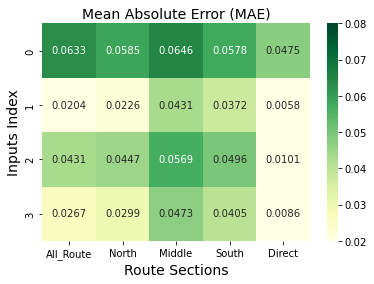

In [16]:
# sns.heatmap(Res_min_MAE, annot=True, fmt='g', cmap="Reds",vmin=0.02, vmax=0.08)
# sns.heatmap(Res_min_MAE, annot=True, fmt='g', cmap="YlOrBr",vmin=0.02, vmax=0.08)
sns.heatmap(Res_min_MAE, annot=True, fmt='g', cmap="YlGn",vmin=0.02, vmax=0.08)
# sns.heatmap(Res_min_MAE, annot=True, fmt='g', cmap="YlOrRd",vmin=0.02, vmax=0.08)


plt.xlabel('Route Sections',fontsize=14)
plt.ylabel('Inputs Index',fontsize=14)
plt.title('Mean Absolute Error (MAE)',fontsize=14)

plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Heatmap_search_ANNReg_diff_Inputs_diff_Sections_MAE_'+'.png', dpi=600)


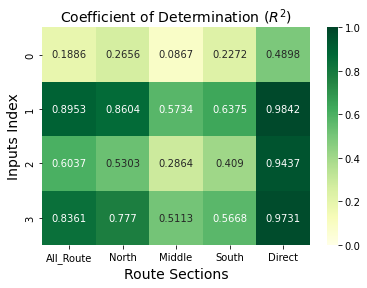

In [17]:
# sns.heatmap(Res_max_R2, annot=True, fmt='g', cmap="Reds",vmin=0., vmax=1)
# sns.heatmap(Res_max_R2, annot=True, fmt='g', cmap="YlOrBr",vmin=0., vmax=1)
sns.heatmap(Res_max_R2, annot=True, fmt='g', cmap="YlGn",vmin=0., vmax=1)
# sns.heatmap(Res_max_R2, annot=True, fmt='g', cmap="YlOrRd",vmin=0.0, vmax=1)


plt.xlabel('Route Sections',fontsize=14)
plt.ylabel('Inputs Index',fontsize=14)
plt.title('Coefficient of Determination ($R^2$)', fontsize=14)

plt.savefig('C:/Users/'+user_name+'/'+Output_Subfolder+'/Heatmap_search_ANNReg_diff_Inputs_diff_Sections_R2_'+'.png', dpi=600)


In [18]:
from IPython.display import Javascript
from nbconvert import HTMLExporter

def save_notebook():
    display(
        Javascript("IPython.notebook.save_notebook()"),
        include=['application/javascript']
    )

def output_HTML(read_file, output_file):
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)

cwd = os.getcwd() 
directory = os.path.join('C:/Users/'+user_name+'/iHelm/Spatio_Temporl_Agg_Eff_Score')
os.chdir(directory) 
####################
import random
sym=round(random.uniform(0, 1),4)  

import time

save_notebook()
time.sleep(3)
current_file = 'Heatmap_ANN_Reg_Diff_Inps_Sects_v1.ipynb'
output_file = 'C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/Pred_DT_Results/Heatmap_ANN_Reg_Diff_Inps_Sects_v1'+str(sym)+'.html'

# os.chdir('C:/Users/mohabu/OneDrive - Högskolan i Halmstad/Pred_DT_Results')
output_HTML(current_file, output_file)
